# **Fashion-Mnsit DataSet classification through ANN**

## **Importing the Libries**

In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## **Loading the DataSet**

### Method #1 

In [6]:
from openml import datasets
from openml.datasets import get_dataset,list_datasets

In [7]:
# List all datasets and their properties
full_dataset_list=datasets.list_datasets(output_format="dataframe")

# full Detail of The DataSet

In [9]:
full_dataset_list[full_dataset_list["name"]=='Fashion-MNIST']

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
40996,40996,Fashion-MNIST,1,2506,active,ARFF,7000.0,10.0,7000.0,10.0,785.0,70000.0,0.0,0.0,784.0,1.0


## Dataset look like This 


![Fashion-MNIST](https://analyticsindiamag.com/wp-content/uploads/2020/05/image-plot1.png)

## **Now loading that DataSet**

In [25]:
data=get_dataset("Fashion-MNIST")
data

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19964\92184463.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  data=get_dataset("Fashion-MNIST")


OpenML Dataset
Name..........: Fashion-MNIST
Version.......: 1
Format........: ARFF
Upload Date...: 2017-12-20 13:28:27
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff
OpenML URL....: https://www.openml.org/d/40996
# of features.: 785
# of instances: 70000

In [26]:
data

OpenML Dataset
Name..........: Fashion-MNIST
Version.......: 1
Format........: ARFF
Upload Date...: 2017-12-20 13:28:27
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff
OpenML URL....: https://www.openml.org/d/40996
# of features.: 785
# of instances: 70000

### Now Change the Data To DataFrame

In [30]:
# Get the data itself as a dataframe (or otherwise)
X, Y, _, _ = data.get_data(dataset_format="dataframe")

# our fully Dataset are 

In [33]:
data=X
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,1
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data.shape

(70000, 785)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), uint8(784)
memory usage: 52.4 MB


In [39]:
data.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       0
Length: 785, dtype: int64

In [41]:
data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


In [42]:
data['class'].dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=True, categories_dtype=object)

In [43]:
Total_class=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# **Display DataSet**

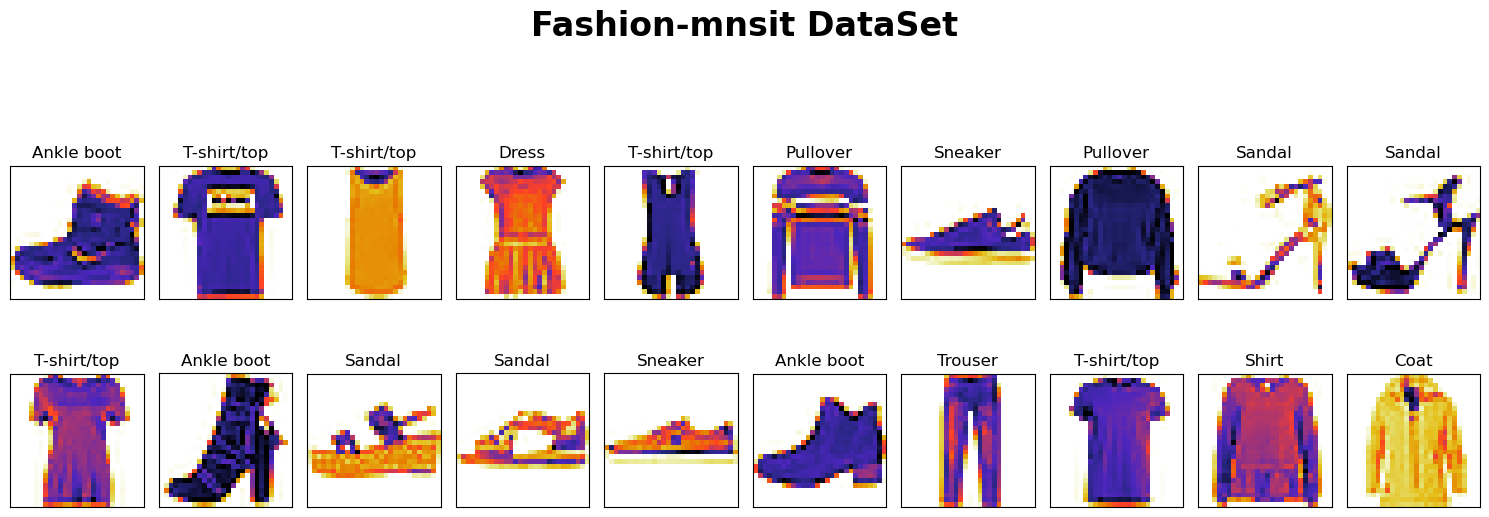

In [69]:

# Number of digits to display
n = 20

# Create a figure to display the images
fig = plt.figure(figsize=(15, 6))

# Add an H1-style heading
fig.suptitle('Fashion-mnsit DataSet', fontsize=24, fontweight='bold')

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n//2, i+1)
    
    # Display the original image
    # Convert the Series to a NumPy array before reshaping
    plt.imshow(x.iloc[i].values.reshape(28,28), cmap='CMRmap_r')
    
    index=int(y[i])
    
    # Set the title to the corresponding label
    plt.title(f"{Total_class[index]}")
    
    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


In [357]:
# print("'rf' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'")

# Now preprocessing the DataSet

## **Defeining input and Target Featutres**

#### **input to the Mode**

In [58]:
x=data.drop(columns="class",axis=1)
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
x.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: uint8

#### **Traget Feature**

In [63]:
y=data["class"]
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0' < '1' < '2' < '3' ... '6' < '7' < '8' < '9']

### **Scaled the input features**

In [102]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### first change them to Numpy array

In [105]:
x_array=x.to_numpy()
x_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### now there DataType are `uint8` which are not acceptable for Scaling than we change them to `float` 

In [108]:
x_array=x_array.astype("float")
x_array.dtype

dtype('float64')

#### Now we scaled all the pixel Between the `0 and 1`

In [111]:
x_array /=255

In [113]:
x_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
x=pd.DataFrame(x_array)
x

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000003,0.000025,0.000135,0.000388,0.000972,0.001603,0.003149,0.008645,0.022098,0.056510,...,0.135617,0.091328,0.065144,0.069896,0.089757,0.070463,0.033428,0.010790,0.003281,0.000286
std,0.000343,0.001163,0.004709,0.009643,0.017287,0.022911,0.032104,0.055362,0.092937,0.149758,...,0.225822,0.191903,0.165000,0.172163,0.203346,0.177379,0.115796,0.068179,0.036308,0.008353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.176471,0.854902,0.725490,0.890196,0.901961,0.878431,0.882353,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


# **Now Preprocessing the Traget Features**

In [123]:
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0' < '1' < '2' < '3' ... '6' < '7' < '8' < '9']

In [129]:
y.shape

(70000,)

In [143]:
number_of_class=len(data["class"].unique())
number_of_class

10

# **applay onehot encoding**

In [147]:
y=to_categorical(y,number_of_class)
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
y.shape

(70000, 10)

In [151]:
y_dataFrame=pd.DataFrame(y)
y_dataFrame

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Now Our DataSet are look like this** 

In [156]:
x.shape,y.shape

((70000, 784), (70000, 10))

### **applay train test spliting on this DataSet**

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=110,test_size=.20,stratify=y)

In [161]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
29146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.72549,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007843,0.000000,0.0,0.0
25487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.007843,0.000000,0.000000,0.000000,0.0,0.0
15201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
67463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
65182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.270588,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
29373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.360784,0.403922,0.058824,0.058824,0.0,0.0
37215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [194]:
print("\n\n\nFull DataSet info")
print("-----------------------------------------------------")
print("Training data")
print("-----------------")
# Check the shapes of the training and test datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape) 


print("\n\n-----------------------------------------------------")
print("Testing data")
print("---------------")

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)





Full DataSet info
-----------------------------------------------------
Training data
-----------------
x_train shape: (56000, 784)
y_train shape: (56000, 10)


-----------------------------------------------------
Testing data
---------------
x_test shape: (14000, 784)
y_test shape: (14000, 10)


# **Setting up the Hyper-paramter for the Model**

In [197]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the number of neurons in the first hidden layer
hidden1 = 500

# Define the number of neurons in the second hidden layer
hidden2 = 50

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 30

# **Setting up Model and Their Layers**
#### Create and Build the Model:

In [209]:

def get_model():
    # Create a Sequential model, which allows us to build a neural network layer by layer
    model = Sequential()
    
    # Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
    # The 'input_dim' specifies the input size for this layer
    model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
    
    
    # Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
    model.add(Dense(hidden2, activation='relu'))
    
    
    # Add the output layer with 'classes' neurons, using softmax activation function
    # Softmax activation ensures that the output values represent probabilities of each class
    model.add(Dense(classes, activation='softmax'))
    
    
    ### Compilation ###
    
    # Compile the model by specifying the loss function, optimizer, and evaluation metrics
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'], optimizer='sgd')

    return model
    
    
    


In [216]:
Model=get_model()
Model.summary()

D:\setups\ancondaInstall\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │        25,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,060 (1.59 MB)

 Trainable params: 418,060 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

# **Training the Fully connected Neural Networks Model**

In [220]:
from time import time

In [257]:
# Recording the sarting time 
start_time=time()


# Fit the model on the training data
Model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1)




# Recording the sarting time 
end_time=time()

print(f"Total Training Time of The Model : {round(end_time-start_time,3)} Second")



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8753 - loss: 0.3602
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8733 - loss: 0.3645
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8762 - loss: 0.3619
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8775 - loss: 0.3556
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8737 - loss: 0.3556
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8749 - loss: 0.3576
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8766 - loss: 0.3515
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8776 - loss: 0.3491
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8787 - loss: 0.3469
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8797 - loss: 0.3451
Total Training Time of The Model : 31.146 Second


# **Now Testing the Model**

In [247]:
# Predict probabilities for the test set using the trained model
Predication_by_the_Model = Model.predict(x_test, verbose=0)

Predication_by_the_Model1 = np.where(Predication_by_the_Model > 0.5, 1, 0)
Predication_by_the_Model1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [239]:
p=pd.DataFrame(Predication_by_the_Model)
p

,0,1,2,3,4,5,6,7,8,9
0,9.305768e-02,6.630723e-03,1.146961e-02,8.614411e-01,1.487850e-02,3.376657e-07,1.236662e-02,3.683141e-07,0.000155,2.370657e-07
1,2.735382e-09,4.608831e-10,2.585701e-09,1.846424e-08,6.688727e-11,5.666730e-05,1.377332e-09,5.520873e-04,0.000009,9.993826e-01
2,7.508955e-07,1.174878e-08,1.452621e-05,8.043531e-08,3.619311e-05,9.004830e-10,8.106212e-05,8.698883e-09,0.999867,2.752555e-09
3,4.364606e-06,7.882509e-07,2.389183e-06,8.641344e-06,1.557465e-07,4.107687e-03,2.711956e-06,8.167985e-01,0.000164,1.789108e-01
4,1.697455e-07,1.589758e-09,8.982290e-06,1.607038e-07,2.166754e-06,1.594738e-05,5.027772e-07,9.154228e-08,0.999971,8.708337e-07
...,...,...,...,...,...,...,...,...,...,...
13995,8.970385e-01,4.292664e-06,3.677247e-02,2.074496e-03,8.910105e-05,1.652460e-12,6.393880e-02,3.241748e-11,0.000082,1.942935e-10
13996,9.264412e-01,2.662742e-02,7.358440e-03,7.495312e-03,2.823618e-04,6.526796e-06,3.085248e-02,6.058283e-06,0.000913,1.705284e-05
13997,9.659110e-01,1.374462e-05,4.640604e-04,2.934447e-03,1.669155e-05,7.649109e-12,3.065332e-02,3.332125e-09,0.000007,2.169368e-09
13998,7.764922e-04,1.751843e-02,9.356822e-01,7.498096e-03,3.132248e-02,2.353403e-05,6.525296e-03,1.409543e-07,0.000650,2.990572e-06


In [241]:
p = np.where(Predication_by_the_Model > 0.5, 1, 0)
p

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [243]:
p=pd.DataFrame(p)
p

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
13995,1,0,0,0,0,0,0,0,0,0
13996,1,0,0,0,0,0,0,0,0,0
13997,1,0,0,0,0,0,0,0,0,0
13998,0,0,1,0,0,0,0,0,0,0


In [245]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [259]:
# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(Predication_by_the_Model1, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8330714285714286


In [263]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [265]:
Predication_by_the_Model1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [267]:

predication_original = np.argmax(Predication_by_the_Model1, axis=1)
predication_original

array([3, 9, 8, ..., 0, 2, 2], dtype=int64)

In [269]:
predication_original=pd.DataFrame(predication_original)
predication_original

,0
0,3
1,9
2,8
3,7
4,8
...,...
13995,0
13996,0
13997,0
13998,2


In [273]:
Predication_by_the_Model12=pd.DataFrame(Predication_by_the_Model1)
Predication_by_the_Model12

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
13995,1,0,0,0,0,0,0,0,0,0
13996,1,0,0,0,0,0,0,0,0,0
13997,1,0,0,0,0,0,0,0,0,0
13998,0,0,1,0,0,0,0,0,0,0


In [279]:
combined=pd.concat([Predication_by_the_Model12,predication_original],axis=1)

In [281]:
combined

,0,1,2,3,4,5,6,7,8,9,0
0,0,0,0,1,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,1,9
2,0,0,0,0,0,0,0,0,1,0,8
3,0,0,0,0,0,0,0,1,0,0,7
4,0,0,0,0,0,0,0,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...
13995,1,0,0,0,0,0,0,0,0,0,0
13996,1,0,0,0,0,0,0,0,0,0,0
13997,1,0,0,0,0,0,0,0,0,0,0
13998,0,0,1,0,0,0,0,0,0,0,2


# **Changing the prdication and actully value to Orginal form**

## **prediction** 

In [285]:

predication_original_from = np.argmax(Predication_by_the_Model1, axis=1)
predication_original_from

array([3, 9, 8, ..., 0, 2, 2], dtype=int64)

## **actual**

In [290]:

y_test_orginal_from= np.argmax(y_test, axis=1)
y_test_orginal_from

array([3, 7, 8, ..., 0, 2, 2], dtype=int64)

## **Evaluation of the Model**

In [294]:
test_accuracy = accuracy_score(predication_original_from, y_test_orginal_from)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8425


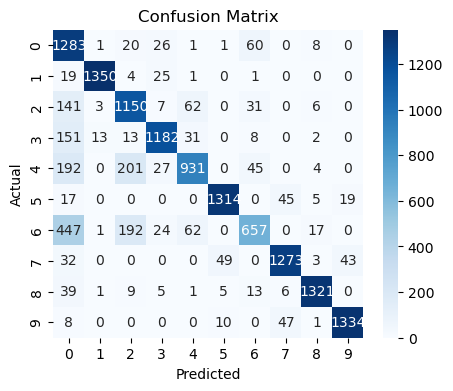

In [304]:
# Compute confusion matrix
cm = confusion_matrix(y_test_orginal_from, predication_original_from)

# Display confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [306]:
from sklearn.metrics import precision_score,recall_score

In [314]:
# precision_score(y_test_orginal_from, predication_original_from)

In [312]:
# Calculate precision score for multiclass classification
precision = precision_score(y_test_orginal_from, predication_original_from, average='macro')
print(f'Precision Score (macro): {precision}')

Precision Score (macro): 0.863713263325575


In [316]:
# Calculate precision score for multiclass classification
precision = recall_score(y_test_orginal_from, predication_original_from, average='macro')
print(f'recall_score (macro): {precision}')

recall_score (macro): 0.8425


# **Display the predication of The Model**

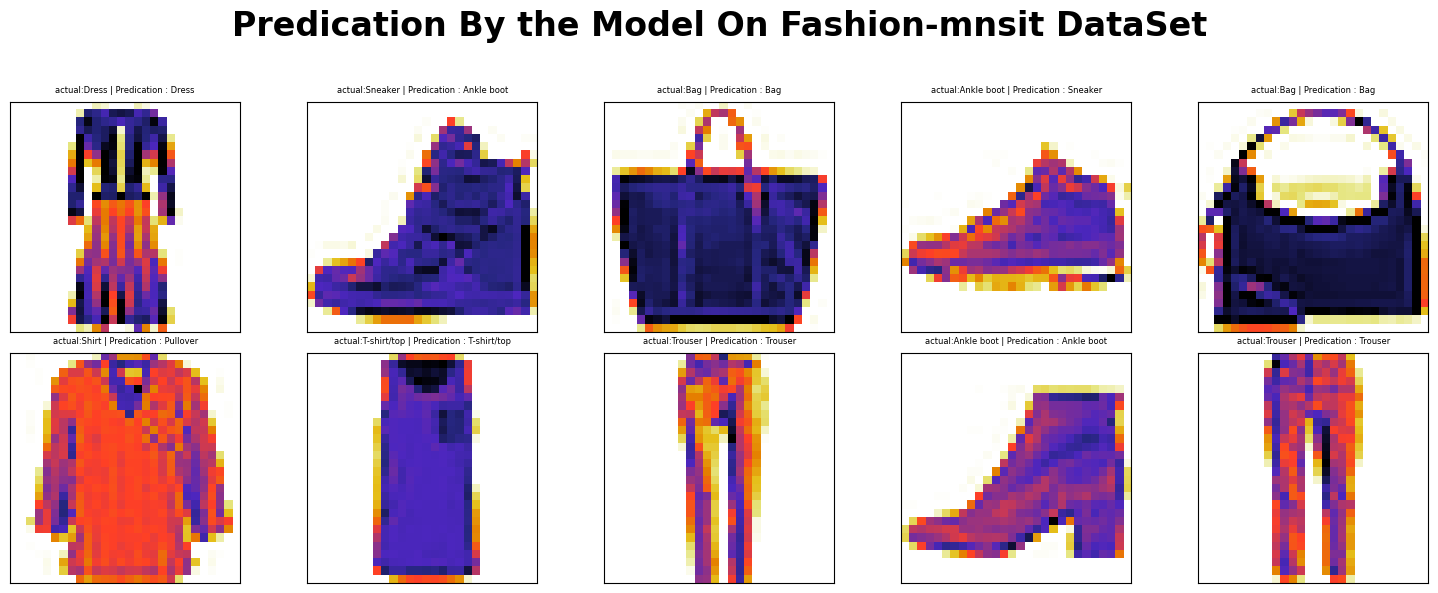

In [369]:

# Number of digits to display
n = 10

# Create a figure to display the images
fig = plt.figure(figsize=(15, 6))

# Add an H1-style heading
fig.suptitle('Predication By the Model On Fashion-mnsit DataSet', fontsize=24, fontweight='bold')

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n//2, i+1)
    
    # Display the original image
    # Convert the Series to a NumPy array before reshaping
    plt.imshow(x_test.iloc[i].values.reshape(28,28), cmap='CMRmap_r')
    
    index1=y_test_orginal_from[i]
    index2=predication_original_from[i] 
    
    # Set the title to the corresponding label
    plt.title(f"actual:{Total_class[index1]} | Predication : {Total_class[index2]}",fontsize=6)
    
    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


# **Model Accuracy** 

In [375]:
test_accuracy = accuracy_score(predication_original_from, y_test_orginal_from)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8425
